# BBBP (Blood-Brain Barrier Penetration)

The blood-brain barrier (BBB) is a selective barrier in the brain that protects the central nervous system from toxins but also limits the penetration of drugs.

Usage:
* Development of drugs for brain disorders (Alzheimer, Parkinson, epilepsy).
* Toxicology studies - some substances should not enter the brain.


In [1]:
!pip install transformers
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.5 MB/s eta 0:00:00
  Cr

In [82]:
import torch
import numpy as np
import pandas as pd
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from simpletransformers.classification import ClassificationModel
from transformers import AutoTokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Computation Unit: {device}")

Computation Unit: cuda


# Name Dataset + BERT

In [83]:
# Load PubMed BERT tokenizer from HuggingFace

model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [84]:
# load train and test dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/Steigner/PubMed-BERT/refs/heads/main/B3DB_cleaned_name_TRAIN.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Steigner/PubMed-BERT/refs/heads/main/B3DB_cleaned_name_TEST.csv")

In [85]:
model_args = {
    "num_train_epochs": 5,
    "learning_rate": 1e-4,
    "train_batch_size": 32,
    "eval_batch_size": 32,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": True,
    "overwrite_output_dir": True,
    "use_cuda": torch.cuda.is_available(),
    "use_early_stopping": True,
    "tensorboard_dir": "runs/bert_training"
}

# Set up model and training
model = ClassificationModel("bert", model_name, args=model_args)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
model.train_model(train_df, eval_df=test_df, show_running_loss=True)

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

(510, 0.6450776725423102)

In [87]:
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=metrics.accuracy_score)
pred_test = np.argmax(model_outputs, axis=-1)

print("\nModel Evaluation:")
print(result)

accuracy = metrics.accuracy_score(test_df.label, pred_test)
print(f"\nTest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(metrics.classification_report(test_df.label, pred_test, digits=2))

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():



Model Evaluation:
{'mcc': 0.31343214840801004, 'accuracy': 0.7047021943573668, 'f1_score': 0.6357403962104142, 'tp': 909, 'tn': 215, 'fp': 357, 'fn': 114, 'auroc': 0.6508401178489155, 'auprc': 0.7265256765214717, 'acc': 0.7047021943573668, 'eval_loss': 0.6080540978908539}

Test Accuracy: 0.70

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.38      0.48       572
           1       0.72      0.89      0.79      1023

    accuracy                           0.70      1595
   macro avg       0.69      0.63      0.64      1595
weighted avg       0.69      0.70      0.68      1595



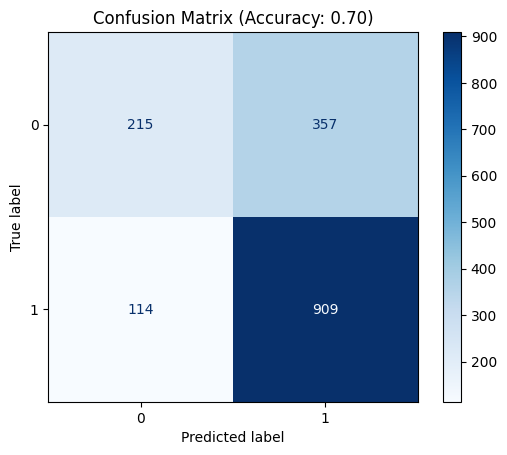

In [88]:
cm = confusion_matrix(test_df.label, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(test_df.label, pred_test):.2f})')
plt.show()

In [89]:
predictions, raw_outputs = model.predict(['threomefloquine'])

if predictions[0] == 1:
  print("\nPenetrant of BBB")
else:
  print("Non-penetrant of BBB")


predictions, raw_outputs = model.predict(['crotetamide'])
if predictions[0] == 1:
  print("\nPenetrant of BBB")
else:
  print("Non-penetrant of BBB")

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Penetrant of BBB


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Penetrant of BBB


# Smile Dataset + RoBERTA

In [90]:
# load PubMed BERT tokenizer from HuggingFace

model_name = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [91]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Steigner/PubMed-BERT/refs/heads/main/B3DB_cleaned_SMILES_TRAIN.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Steigner/PubMed-BERT/refs/heads/main/B3DB_cleaned_SMILES_TEST.csv")

In [92]:
model_args = {
    "num_train_epochs": 5,
    "learning_rate": 1e-4,
    "train_batch_size": 32,
    "eval_batch_size": 32,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": True,
    "overwrite_output_dir": True,
    "use_cuda": torch.cuda.is_available(),
    "use_early_stopping": True,
    "tensorboard_dir": "runs/roberta_training"
}
model = ClassificationModel('roberta', model_name, args=model_args)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [93]:
model.train_model(train_df, eval_df=test_df, show_running_loss=True)

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/102 [00:00<?, ?it/s]

(510, 0.2473709989485203)

In [94]:
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=metrics.accuracy_score)
pred_test = np.argmax(model_outputs, axis=-1)

print("\nModel Evaluation:")
print(result)

accuracy = metrics.accuracy_score(test_df.label, pred_test)
print(f"\nTest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(metrics.classification_report(test_df.label, pred_test, digits=2))

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():



Model Evaluation:
{'mcc': 0.6534783647100775, 'accuracy': 0.8426332288401254, 'f1_score': 0.8260852377603269, 'tp': 918, 'tn': 426, 'fp': 146, 'fn': 105, 'auroc': 0.9012083957098619, 'auprc': 0.9408442209108422, 'acc': 0.8426332288401254, 'eval_loss': 0.6889358294010163}

Test Accuracy: 0.84

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       572
           1       0.86      0.90      0.88      1023

    accuracy                           0.84      1595
   macro avg       0.83      0.82      0.83      1595
weighted avg       0.84      0.84      0.84      1595



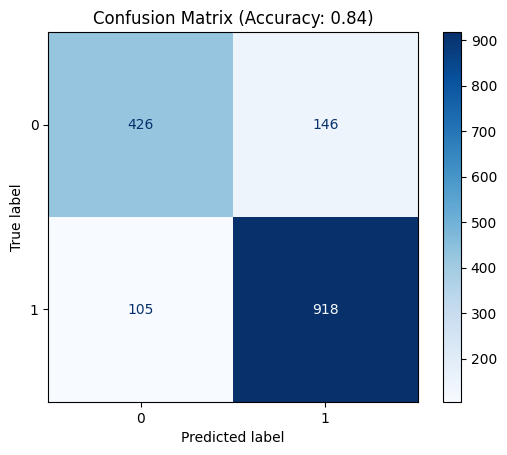

In [95]:
cm = confusion_matrix(test_df.label, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(test_df.label, pred_test):.2f})')
plt.show()

In [96]:
predictions, raw_outputs = model.predict(['threomefloquine'])

if predictions[0] == 1:
  print("\nPenetrant of BBB")
else:
  print("Non-penetrant of BBB")


predictions, raw_outputs = model.predict(['crotetamide'])
if predictions[0] == 1:
  print("\nPenetrant of BBB")
else:
  print("Non-penetrant of BBB")

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Non-penetrant of BBB


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Non-penetrant of BBB
